In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
mydata = pd.read_csv('drive/My Drive/DM/HR_comma_sep.csv', header=None,  
                         names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                                  'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department','salary',
                                  'left'], sep = ',')

In [ ]:
data = mydata.iloc[1:,:]
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
1,0.38,0.53,2,157,3,0,0,sales,low,1
2,0.8,0.86,5,262,6,0,0,sales,medium,1
3,0.11,0.88,7,272,4,0,0,sales,medium,1
4,0.72,0.87,5,223,5,0,0,sales,low,1
5,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,14999,14999,14999,14999,14999,14999,14999,14999,14999,14999
unique,92,65,6,215,8,2,2,10,3,2
top,0.1,0.55,4,156,3,0,0,sales,low,0
freq,358,358,4365,153,6443,12830,14680,4140,7316,11428


In [ ]:
print(data.department.unique())
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [ ]:
data.department =data.department.replace(to_replace ='sales',value= '0')
data.department =data.department.replace(to_replace ='accounting',value= '1')
data.department =data.department.replace(to_replace ='hr',value= '2')
data.department =data.department.replace(to_replace ='technical',value= '3')
data.department =data.department.replace(to_replace ='support',value= '4')
data.department =data.department.replace(to_replace ='management',value= '5')
data.department =data.department.replace(to_replace ='IT',value= '6')
data.department =data.department.replace(to_replace ='product_mng',value= '7')
data.department =data.department.replace(to_replace ='marketing',value= '8')
data.department =data.department.replace(to_replace ='RandD',value= '9')

data.salary =data.salary.replace(to_replace ='low',value= '0')
data.salary =data.salary.replace(to_replace ='medium',value= '1')
data.salary =data.salary.replace(to_replace ='high',value= '2')

print(data.department.unique())
print(data.salary.unique())
data = data.astype(float)
data.describe()

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
['0' '1' '2']


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


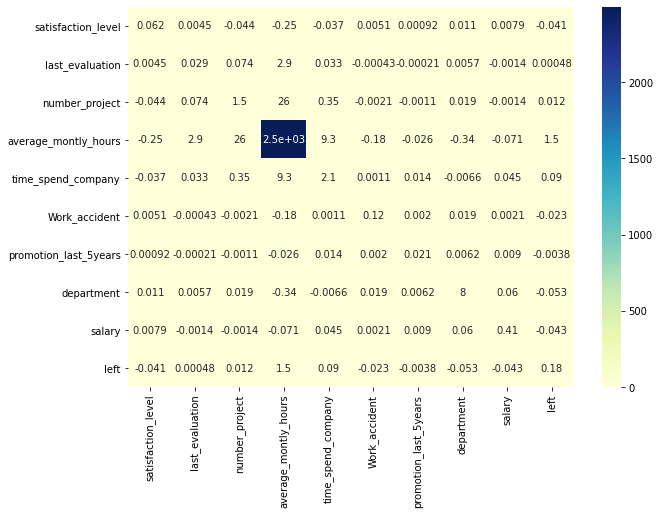

In [ ]:
# Heatmap Sample
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(data.cov(), annot=True, cmap="YlGnBu",ax=ax)

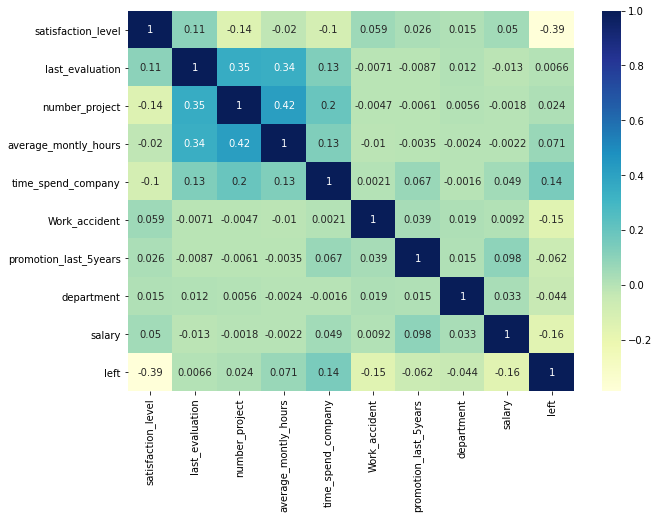

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu",ax=ax)

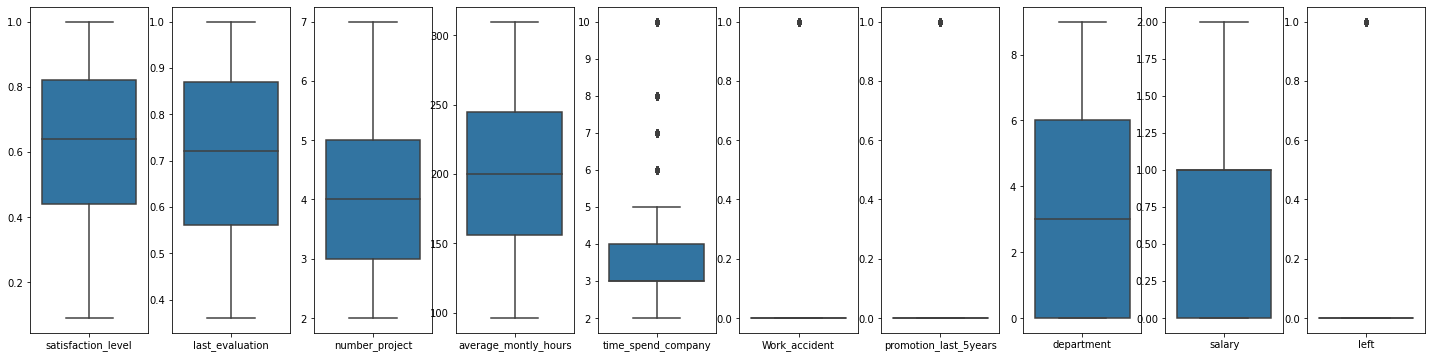

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(nrows=1,ncols=10,figsize=(25,6))
sns.boxplot(data = data.iloc[:,0:1],ax=ax1)
sns.boxplot(data = data.iloc[:,1:2],ax=ax2)
sns.boxplot(data = data.iloc[:,2:3],ax=ax3)
sns.boxplot(data = data.iloc[:,3:4],ax=ax4)
sns.boxplot(data = data.iloc[:,4:5],ax=ax5)
sns.boxplot(data = data.iloc[:,5:6],ax=ax6)
sns.boxplot(data = data.iloc[:,6:7],ax=ax7)
sns.boxplot(data = data.iloc[:,7:8],ax=ax8)
sns.boxplot(data = data.iloc[:,8:9],ax=ax9)
sns.boxplot(data = data.iloc[:,9:10],ax=ax10)

In [ ]:
#normalizing data
normalized_data  = data.copy()
for x in range(normalized_data.shape[1]):
    minn = min(normalized_data.iloc[:,x])
    maxx = max(normalized_data.iloc[:,x])
    normalized_data.iloc[:,x] = normalized_data.iloc[:,x] - minn
    diff = maxx - minn
    normalized_data.iloc[:,x] = normalized_data.iloc[:,x] / diff

normalized_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279,0.144610,0.021268,0.371091,0.297353,0.238083
std,0.273220,0.267452,0.246518,0.233379,0.182517,0.351719,0.144281,0.313426,0.318591,0.425924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604396,0.562500,0.400000,0.485981,0.125000,0.000000,0.000000,0.333333,0.500000,0.000000
75%,0.802198,0.796875,0.600000,0.696262,0.250000,0.000000,0.000000,0.666667,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


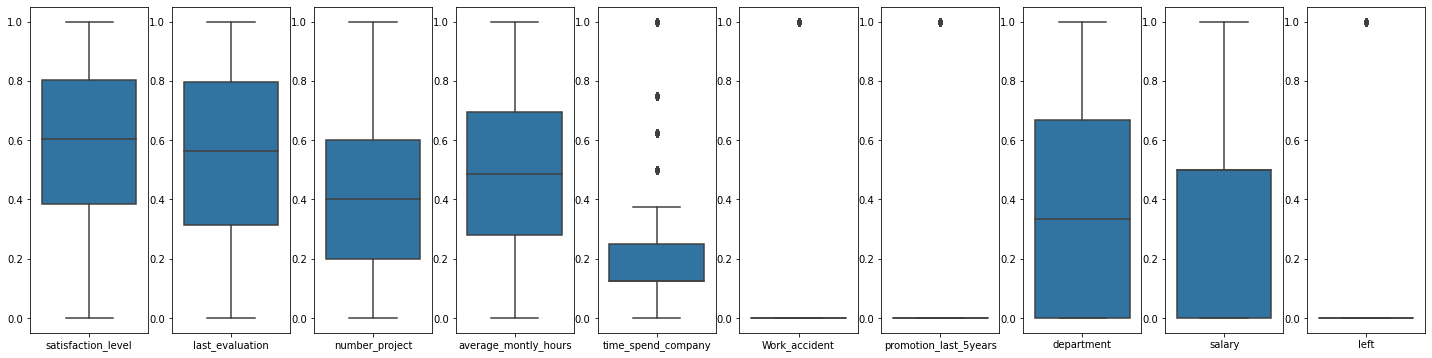

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(nrows=1,ncols=10,figsize=(25,6))
sns.boxplot(data = normalized_data.iloc[:,0:1],ax=ax1)
sns.boxplot(data = normalized_data.iloc[:,1:2],ax=ax2)
sns.boxplot(data = normalized_data.iloc[:,2:3],ax=ax3)
sns.boxplot(data = normalized_data.iloc[:,3:4],ax=ax4)
sns.boxplot(data = normalized_data.iloc[:,4:5],ax=ax5)
sns.boxplot(data = normalized_data.iloc[:,5:6],ax=ax6)
sns.boxplot(data = normalized_data.iloc[:,6:7],ax=ax7)
sns.boxplot(data = normalized_data.iloc[:,7:8],ax=ax8)
sns.boxplot(data = normalized_data.iloc[:,8:9],ax=ax9)
sns.boxplot(data = normalized_data.iloc[:,9:10],ax=ax10)

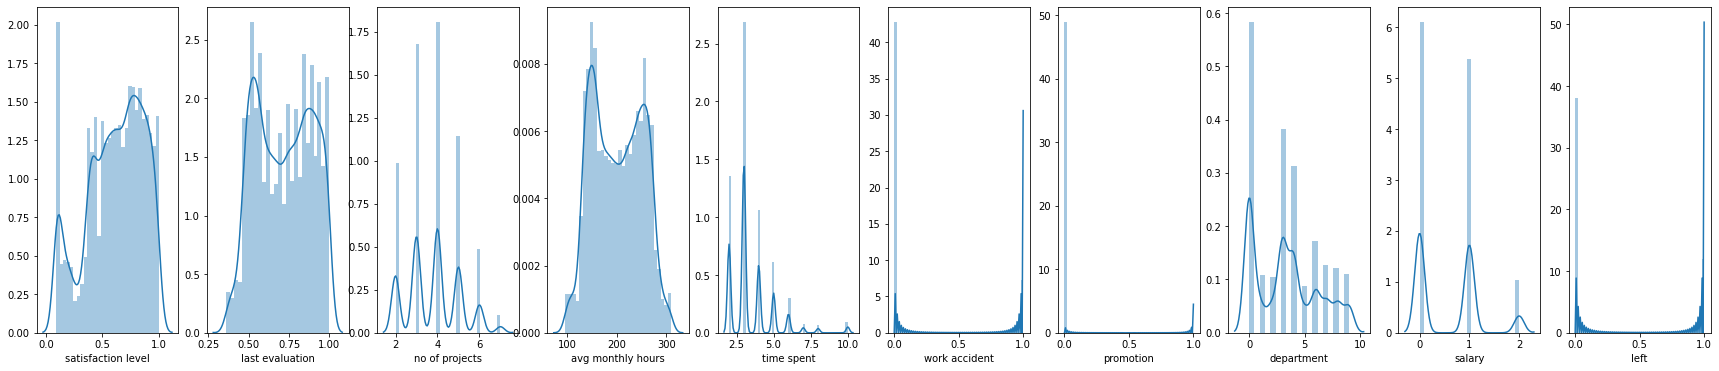

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(nrows=1,ncols=10,figsize=(30,6))
sns.distplot(data.iloc[:,0:1],ax=ax1,kde=True,axlabel='satisfaction level')
sns.distplot(data.iloc[:,1:2],ax=ax2,kde=True,axlabel='last evaluation')
sns.distplot(data.iloc[:,2:3],ax=ax3,kde=True,axlabel='no of projects')
sns.distplot(data.iloc[:,3:4],ax=ax4,kde=True,axlabel='avg monthly hours')
sns.distplot(data.iloc[:,4:5],ax=ax5,kde=True,axlabel='time spent')
sns.distplot(data.iloc[:,5:6],ax=ax6,kde=True,axlabel='work accident')
sns.distplot(data.iloc[:,6:7],ax=ax7,kde=True,axlabel='promotion')
sns.distplot(data.iloc[:,7:8],ax=ax8,kde=True,axlabel='department')
sns.distplot(data.iloc[:,8:9],ax=ax9,kde=True, axlabel='salary')
sns.distplot(data.iloc[:,9:10],ax=ax10,kde=True, axlabel='left')

In [ ]:
data = data.sort_values(by=['left'])

#seperating all the classes from data
zero=0
one=0

for i in range(data.shape[0]):

    if(data.iloc[i,9] == 0):
        zero+=1
        one+=1

    if(data.iloc[i,9] == 1):
        one+=1
        
zerosData = data.iloc[0:zero,:]
onesData = data.iloc[zero:one,:]


In [ ]:
zerosData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945,0.0
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889,2.853289,0.655277,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,6.000000,1.000000,0.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,9.000000,2.000000,0.0


In [ ]:
onesData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730,1.0
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,2.702922,0.537341,0.0
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,3.000000,0.000000,1.0
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,4.000000,1.000000,1.0
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,9.000000,2.000000,1.0
